In [1]:
import ROOT
%jsroot on
import uproot
import matplotlib.pyplot as plt
import numpy as np

Welcome to JupyROOT 6.20/06


In [2]:
def custom_cms_label(ax, label1, label2, lumi=35.9, energy=13, extra_label=''):
    plt.rcParams.update({'font.size': 22})
    ax.text(
        0, 1, r'$\mathbf{CMS}\ \mathit{'+label1+'}\ \mathit{'+label2+'}$',
        ha='left', va='bottom', transform=ax.transAxes,
    )
    ax.text(
        1, 1, r'2018 ({:.0f} TeV)'.format(energy),
        ha='right', va='bottom', transform=ax.transAxes,
    )
    # label on centre top of axes
    ax.text(
        0.5, 1, extra_label,
        ha='center', va='bottom', transform=ax.transAxes,
    )
    plt.rcParams.update({'font.size': 18})

In [3]:
def plot_discr_power_1prong(data, score,x_label, normalized=False, yaxis='linear'):
    
    #Plot discriminating power
    bins = np.linspace(0,1,40)
    fig1 = plt.figure(figsize=(10,8))
    ax1 = fig1.add_subplot(111)
    
    data[score][data['tauFlag_2']==0].hist(bins=bins, histtype=u'step', lw=3, label='GEN $\pi^\pm$', density=normalized)
    data[score][data['tauFlag_2']==1].hist(bins=bins, histtype=u'step', lw=3, label='GEN $\pi^\pm \pi^0$', density=normalized)
    data[score][data['tauFlag_2']==2].hist(bins=bins, histtype=u'step', lw=3, label='GEN $\pi^\pm 2\pi^0$', density=normalized)

    leg = plt.legend(loc=9)
    plt.yscale(yaxis)
    custom_cms_label(ax1, 'Simulation', 'Preliminary' , lumi=59.7, energy=13, extra_label='')
    
    ax1.set_xlabel(x_label)
    ax1.set_ylabel('a.u.')

In [4]:
def plot_discr_power_3prong(data, score,x_label, normalized=False, yaxis='linear'):
    
    #Plot discriminating power
    bins = np.linspace(0,1,40)
    fig1 = plt.figure(figsize=(10,8))
    ax1 = fig1.add_subplot(111)
    
    data[score][data['tauFlag_2']==10].hist(bins=bins, histtype=u'step', lw=3, label='GEN $3\pi^\pm$', density=normalized)
    data[score][data['tauFlag_2']==11].hist(bins=bins, histtype=u'step', lw=3, label='GEN $3\pi^\pm \pi^0$', density=normalized)

    leg = plt.legend(loc=9)
    plt.yscale(yaxis)
    custom_cms_label(ax1, 'Simulation', 'Preliminary' , lumi=59.7, energy=13, extra_label='')

    ax1.set_xlabel(x_label)
    ax1.set_ylabel('a.u.')

In [5]:
t1 = uproot.open("../Merged_ggH_VBF_HToTauTau_M-125_mt_2018.root")["ntuple"]

In [6]:
data = t1.pandas.df(['mvadm_pi_2','mvadm_rho_2','mvadm_a1_2','mvadm_3pi_2','mvadm_3pipi0_2','tauFlag_2','tau_decay_mode_2','gen_match_2'])

In [7]:
data_1prong = data[(data['tau_decay_mode_2']<3) & (data['gen_match_2']==5)]
data_3prong  = data[(data['tau_decay_mode_2']>9) & (data['gen_match_2']==5)]

In [8]:
SMALL_SIZE = 19
MEDIUM_SIZE = 22
BIGGER_SIZE = 29
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title    

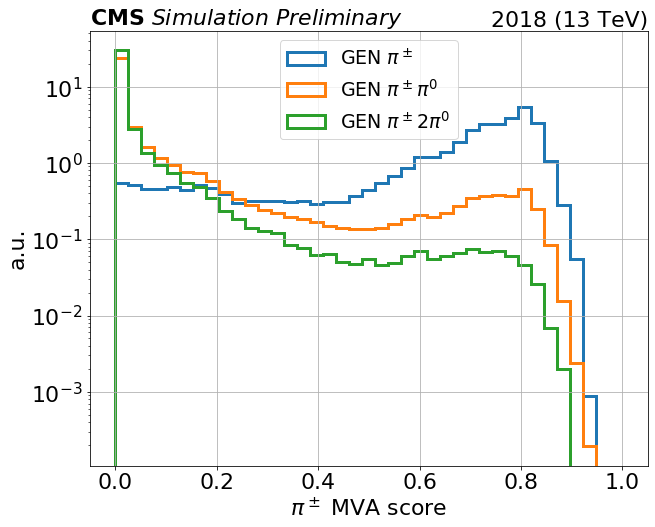

In [9]:
plot_discr_power_1prong(data_1prong,'mvadm_pi_2', x_label = '$\pi^\pm$ MVA score' ,normalized=True,yaxis='log')

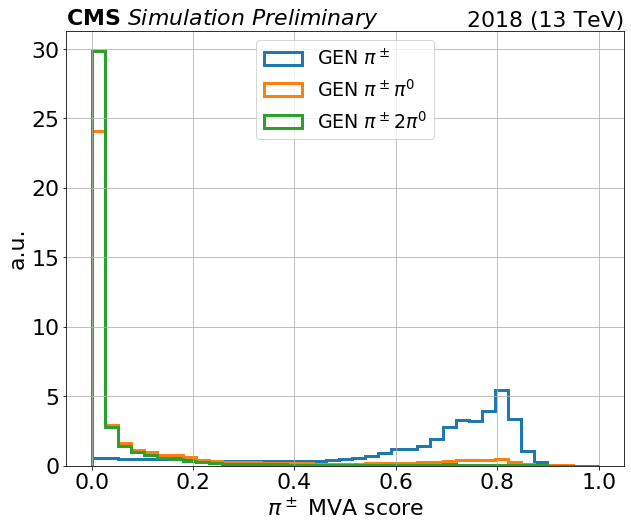

In [10]:
plot_discr_power_1prong(data_1prong,'mvadm_pi_2', x_label = '$\pi^\pm$ MVA score' ,normalized=True,yaxis='linear')

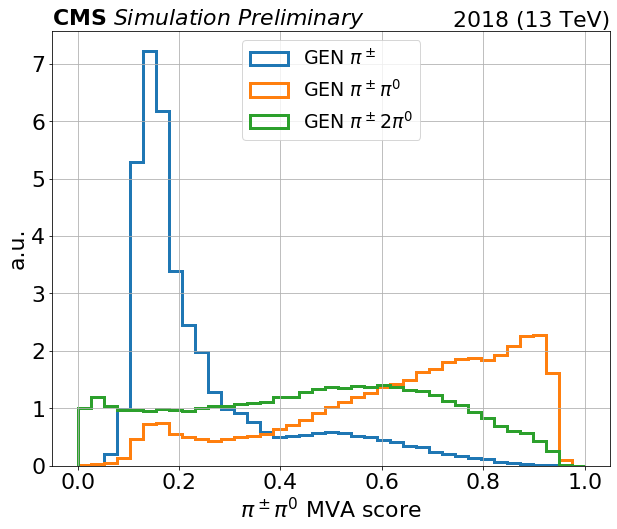

In [11]:
plot_discr_power_1prong(data_1prong, 'mvadm_rho_2', x_label = '$\pi^\pm \pi^0$ MVA score',normalized=True)

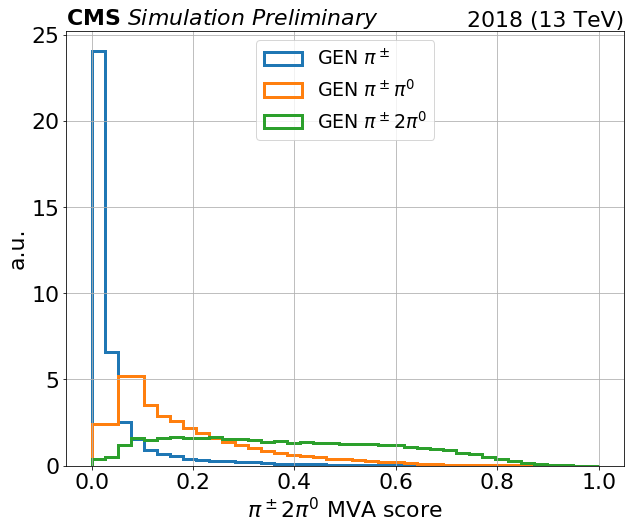

In [12]:
plot_discr_power_1prong(data_1prong, 'mvadm_a1_2', x_label = '$\pi^\pm 2\pi^0$ MVA score',normalized=True)

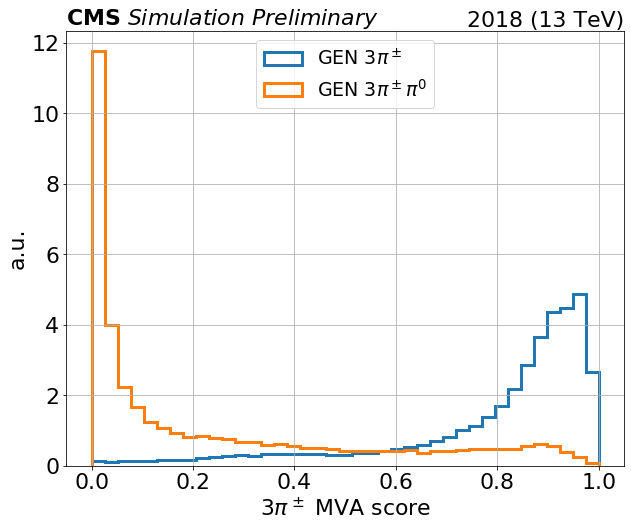

In [13]:
plot_discr_power_3prong(data_3prong, 'mvadm_3pi_2', x_label = '$3\pi^\pm$ MVA score' ,normalized=True)

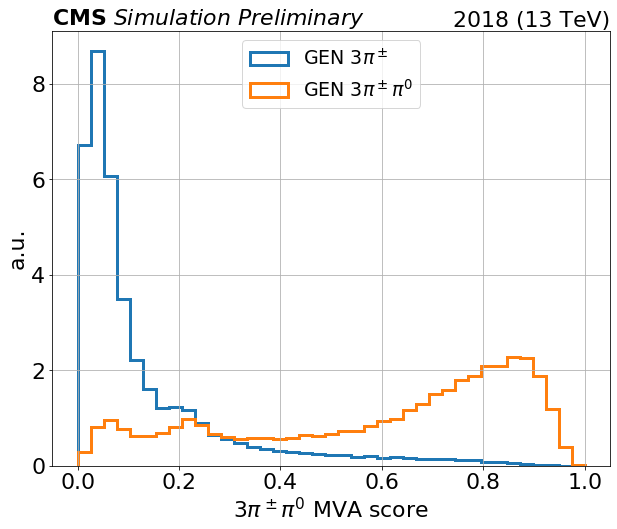

In [14]:
plot_discr_power_3prong(data_3prong, 'mvadm_3pipi0_2',x_label = '$3\pi^\pm \pi^0$ MVA score',normalized=True)